In [328]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting_Serial
import Handle_PotFiles
import time
import glob
os.chdir('/Users/cd8607/Documents/Lammps_MD')

n = 2

cov_base = np.array([4, 8, 16])

mean_base = np.array([0 ,0, 0])

cov_base = np.hstack([cov_base for i in range(n)])

mean_base = np.hstack([mean_base for i in range(n)])

In [329]:
txt = '      0.000000000000      69.391458840000  xlo xhi'

[_str for _str in txt.split(' ') if _str != '']

['0.000000000000', '69.391458840000', 'xlo', 'xhi']

In [330]:
files = glob.glob('EAM_Fit_Files/Atom_Files/*.atom')

for file in files:
    with open(file, 'r') as rfile:
        lines = rfile.readlines()

    lines[1] = '0\n'

    with open(file, 'w') as wfile:
        wfile.writelines(lines)

In [331]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')
pot2, potlines2, pot_params2 = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

n_knots = {}
n_knots['He_F'] = 2
n_knots['He_p'] = 0
n_knots['W-He'] = 4
n_knots['He-He'] = 3
n_knots['H-He'] = 0

eam_fit = EAM_Fitting_Serial.Fit_EAM_Potential(pot, n_knots, pot_params, potlines, None, 0, '')
sample = np.loadtxt('sample.txt')
print(sample)

coef_dict = eam_fit.fit_sample(sample)

print(sample[eam_fit.map['He_F']])
# x_plt = np.linspace(0, 6, 1000)

# y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_p'], eam_fit.knot_pts['He_p'])

# plt.plot(x_plt, y_plt)


t1 = time.perf_counter()
eam_fit.sample_to_file(sample)
t2 = time.perf_counter()
print(t2-t1)

[i % 2 for i in np.arange(10)]

[ -1.72505233  -2.10139866   7.10930846 -20.49957363   0.07102258
   0.18186034   0.0468693    0.11491814   0.70100398  -3.07912673]
[array([0., 0., 0., 0.])]
[0.         1.7581     2.7236     4.85138892] [ 0.         -2.10139866  0.07102258 -0.00389427] [0.         7.10930846 0.18186034 0.00729862] [ 0.00000000e+00 -2.04995736e+01  4.68693048e-02 -1.38782440e-02]
[0.     1.7581 2.7236] [ 0.          0.11491814 -0.06249778] [0.         0.70100398 0.11069161] [ 0.         -3.07912673 -0.21987824]
[-1.72505233]
[array([0., 0., 0., 0.])]
[0.         1.7581     2.7236     4.85138892] [ 0.         -2.10139866  0.07102258 -0.00389427] [0.         7.10930846 0.18186034 0.00729862] [ 0.00000000e+00 -2.04995736e+01  4.68693048e-02 -1.38782440e-02]
[0.     1.7581 2.7236] [ 0.          0.11491814 -0.06249778] [0.         0.70100398 0.11069161] [ 0.         -3.07912673 -0.21987824]
0.018857000017305836


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

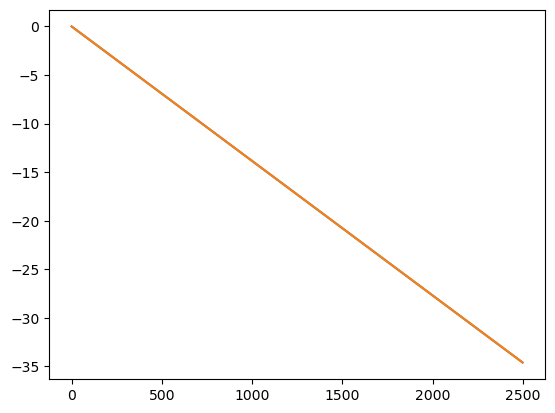

In [332]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

x_plt = np.linspace(0, 20, 1000)

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_F'], eam_fit.knot_pts['He_F'])

# plt.plot(x_plt, y_plt)
plt.plot(pot['He_F'])
plt.plot(pot2['He_F'])

# plt.plot(x_plt, sample[0]*np.sqrt(x_plt))

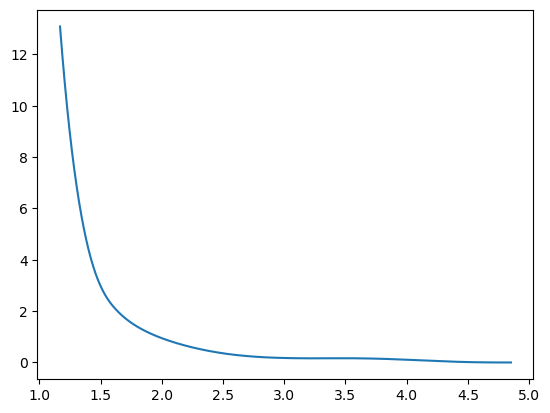

In [333]:
x_plt = np.linspace(1, 5, 1000)
zbl = EAM_Fitting_Serial.ZBL(74, 2)
r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])[1:]

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['W-He'], eam_fit.knot_pts['W-He'])


w_he = pot['W-He'][1:]/r

plt.plot(r[300:],w_he[300:])

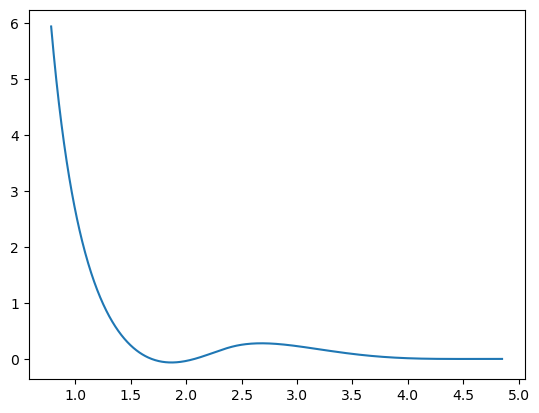

In [334]:
x_plt = np.linspace(1, 5, 1000)
zbl = EAM_Fitting_Serial.ZBL(74, 2)
r = np.linspace(0,eam_fit.pot_params['rc'],eam_fit.pot_params['Nr'])[1:]
y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He-He'], eam_fit.knot_pts['He-He'])

he_he = pot['He-He'][1:]/r

plt.plot(r[200:],he_he[200:])

In [335]:
pot2, potlines2, pot_params2 = Handle_PotFiles.read_pot('git_folder/Potentials/test.0.eam.alloy')
print(potlines)
print(pot_params)
print(pot_params2)

pot_new = {}

for key in pot2.keys():
    pot_new[key] = pot2[key][::4]

Handle_PotFiles.write_pot(pot_new, potlines, 'git_folder/Potentials/test.eam.alloy')

# W-H-He potential 
# 
# 
3 W H He 
   2500    0.0079168464    1250    0.0038811112    4.8513889200
74  183.84        3.14484257 BCC
1  1.008        0.74368788 DIMER
2  4.0026        10.14484257  DIMER

{'Nrho': 2500, 'drho': 0.0079168464, 'Nr': 1250, 'dr': 0.0038811112, 'rc': 4.85138892, 'rho_c': 19.792116}
{'Nrho': 10000, 'drho': 0.0019792116, 'Nr': 5000, 'dr': 0.0009702778, 'rc': 4.85138892, 'rho_c': 19.792116}


In [336]:
data = np.loadtxt('dft_data.txt')

data_new = []

for row in data:
    v, h, he, image, ef, rvol = row

    if he == 0 and h > 0:
        continue
    
    data_new.append(row)

data_new = np.array(data_new)

np.savetxt('dft_data_new.txt', data_new ,fmt='%.3f')

In [337]:
from scipy import interpolate

with open('log.lammps', 'r') as file:
    log = file.readlines()

n_proc = int(log[1].split(' ')[2])

val = log[-1].split()[-2*n_proc:]

data = np.array([float(x) for x in val]).reshape(n_proc, 2)

x = data[:, 0]

y = data[:, 1]

y -= y.min()

cs = interpolate.Akima1DInterpolator(x, y)

x_plt = np.linspace(0,1,100)

y_plt = cs(x_plt)

plt.scatter(x, y, marker='o')
plt.plot(x_plt, y_plt,  linestyle=':')
plt.xlabel('Reaction Coordinate')
plt.ylabel('Energy / eV')
plt.title('Migration of Helium combining from 2 tetrahedral positions')

IndexError: list index out of range